Tensor("Tanh_13:0", shape=(?, 10), dtype=float32)


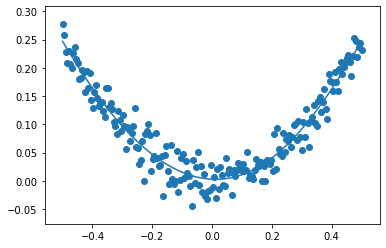

In [6]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt 

#使用numpy生成200个随即点
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis].astype('float32')


noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise
#print(y_data)
#定义两个placeholder
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

#定义神经网络中间层
Weights_L1 = tf.Variable(np.random.normal(size=[1,10]).astype('float32'))
biases_L1 = tf.Variable(tf.zeros([1, 10]))
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + biases_L1
L1 = tf.tanh(Wx_plus_b_L1)

print(L1)
#定义输出层
Weights_L2 = tf.Variable(np.random.normal(size=[10,1]).astype('float32'))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2
prediction =  tf.tanh(Wx_plus_b_L2)

#定义一个代价函数
loss = tf.reduce_mean(tf.square(y - prediction))
#使用梯度下降法
# train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
train_step = tf.train.AdamOptimizer(1e-2).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(20000):
        sess.run(train_step, feed_dict={x:x_data, y:y_data})
    #获取预测值
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    
    #画图
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value)
    plt.show()